In [18]:
from matplotlib import pyplot as plt
from astropy.table import Table
import numpy as np
from enigma.reion_forest import utils
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

#### Looking at mgii_tau0

In [59]:
tau_file = 'Nyx_output/z45/xHI/ran_skewers_z45_OVT_xHI_0.50_tau.fits'

params = Table.read(tau_file, hdu=1)
skewers = Table.read(tau_file, hdu=2)

In [11]:
params.columns

<TableColumns names=('lit_h','Ob0','Om0','Ode0','z','Ng','Lbox','EOS-logT0','EOS-GAMMA','seed','xHI','dmax','VSIDE')>

In [26]:
params['z'][0]

4.499994172533367

In [19]:
cosmo = FlatLambdaCDM(H0=100.0 * params['lit_h'][0], Om0=params['Om0'][0], Ob0=params['Ob0'][0])

In [60]:
logZ = -3.0

tau0, f_ratio, v_mgii, nh_bar = utils.mgii_tau0(params['z'][0], logZ, cosmo=cosmo)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [95]:
tau0, f_ratio, v_mgii, nh_bar

(0.03069095888708424,
 0.4968318440292445,
 <Quantity 768.46939613 km / s>,
 <Quantity 3.1315264e-05 1 / cm3>)

#### Looking at create_mgii_forest

In [162]:
tau_file = 'Nyx_output/z45/xHI/ran_skewers_z45_OVT_xHI_0.50_tau.fits'

params = Table.read(tau_file, hdu=1)
skewers = Table.read(tau_file, hdu=2)

logZ = -3.50 
z = params['z'][0]
fwhm = 100.0  # Resolution of spectrograph in km/s; 100 km/s for JWST

vel_lores, (flux_tot_lores, flux_igm_lores, flux_cgm_lores), \
vel_hires, (flux_tot_hires, flux_igm_hires, flux_cgm_hires), \
(oden, v_los, T, xHI), cgm_tuple = utils.create_mgii_forest(params, skewers, logZ, fwhm, z=z)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [44]:
np.shape(vel_lores), np.shape(vel_hires)

((388,), (4097,))

In [46]:
np.shape(flux_tot_lores), np.shape(flux_tot_hires), np.shape(oden)

((10, 388), (10, 4097), (10, 4097))

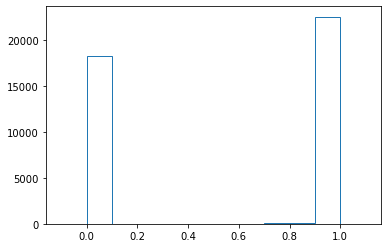

In [97]:
plt.hist(xHI.flatten(), bins=np.arange(-0.1, 1.1, 0.1), histtype='step');

In [94]:
np.mean(xHI.flatten()), np.mean(xHI[0]), np.mean(xHI[5])

(0.5527752621554444, 0.464498410202801, 0.6537431105043878)

In [114]:
Hz = cosmo.H(z)
a = 1.0 / (1.0 + z)
R_lores = (vel_lores * u.km / u.s / a / Hz).to('Mpc')
R_hires = (vel_hires * u.km / u.s / a / Hz).to('Mpc')

In [122]:
R_lores[0:5]

<Quantity [0.32044175, 0.69664469, 1.07284764, 1.44905058, 1.82525352] Mpc>

In [123]:
R_hires[0:5]

<Quantity [0.        , 0.03564097, 0.07128193, 0.1069229 , 0.14256387] Mpc>

In [121]:
R_lores[-1], R_hires[-1]

(<Quantity 145.91098078 Mpc>, <Quantity 145.98540146 Mpc>)

0.991863432945268


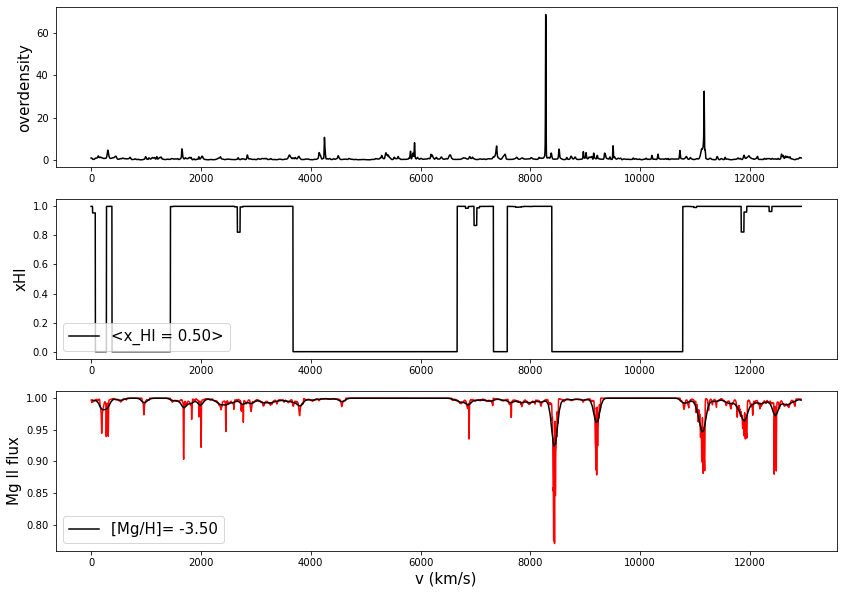

In [163]:
x_hi_label = '<x_HI = 0.50>'
mg_h_label = '[Mg/H]= -3.50'

plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(vel_hires, oden[0], c='k')
plt.ylabel('overdensity', fontsize=15)

plt.subplot(312)
plt.plot(vel_hires, xHI[0], c='k', label=x_hi_label)
plt.ylabel('xHI', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(313)
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k', label=mg_h_label)
plt.xlabel('v (km/s)', fontsize=15)
plt.ylabel('Mg II flux', fontsize=15)
plt.legend(fontsize=15)

print(np.mean(flux_igm_hires.flatten()))

#### (i) Varying metallicity

0.8377080777774406


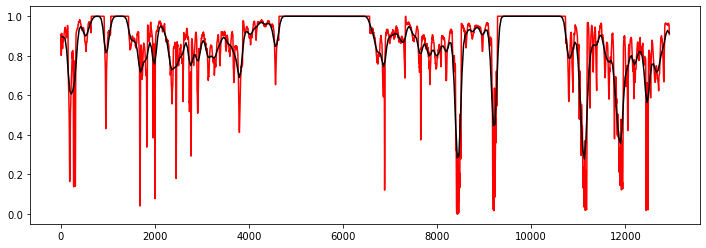

In [128]:
# logZ = -2.0
# higher metallicity means larger optical depth and less transmitted flux
plt.figure(figsize=(12,4))
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k')

print(np.mean(flux_igm_hires.flatten()))

0.9758033445476274


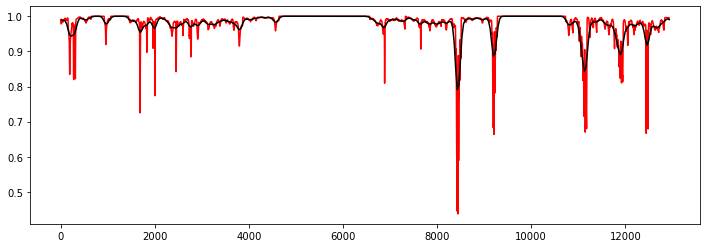

In [132]:
# logZ = -3.50
plt.figure(figsize=(12,4))
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k')

print(np.mean(flux_igm_hires.flatten()))

0.9991612084539775


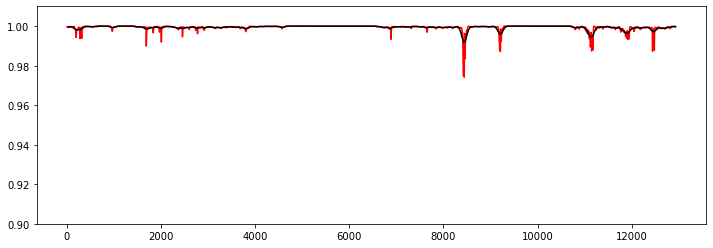

In [136]:
# logZ = -4.5
# note the difference in y-scale 
plt.figure(figsize=(12,4))
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k')
plt.ylim([0.9, 1.01])

print(np.mean(flux_igm_hires.flatten()))

#### (ii) Varying x_HI

In [160]:
tau_file = 'Nyx_output/z45/xHI/ran_skewers_z45_OVT_xHI_0.30_tau.fits'

params = Table.read(tau_file, hdu=1)
skewers = Table.read(tau_file, hdu=2)

logZ = -3.50 
z = params['z'][0]
fwhm = 100.0  # Resolution of spectrograph in km/s; 100 km/s for JWST

vel_lores, (flux_tot_lores, flux_igm_lores, flux_cgm_lores), \
vel_hires, (flux_tot_hires, flux_igm_hires, flux_cgm_hires), \
(oden, v_los, T, xHI), cgm_tuple = utils.create_mgii_forest(params, skewers, logZ, fwhm, z=z)

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


0.9951269226145032


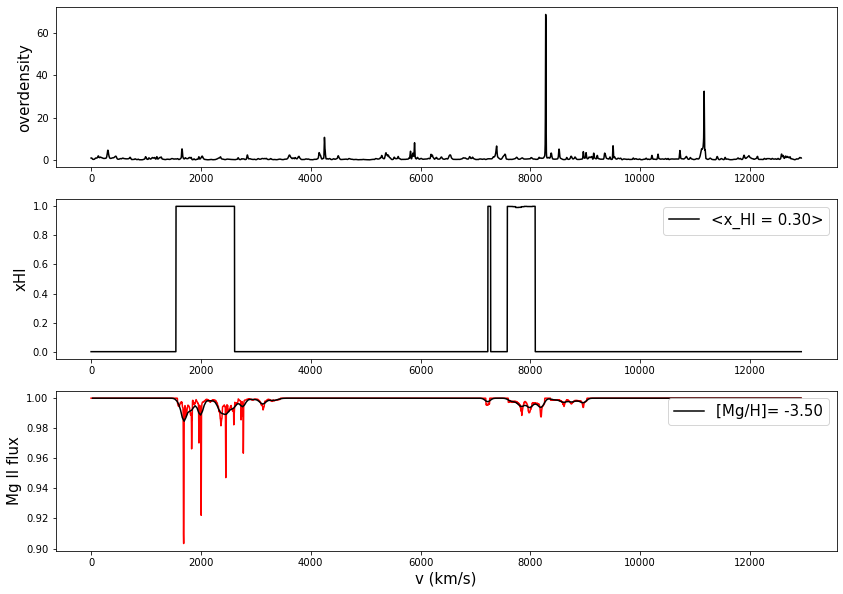

In [161]:
x_hi_label = '<x_HI = 0.30>'
mg_h_label = '[Mg/H]= -3.50'

plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(vel_hires, oden[0], c='k')
plt.ylabel('overdensity', fontsize=15)

plt.subplot(312)
plt.plot(vel_hires, xHI[0], c='k', label=x_hi_label)
plt.ylabel('xHI', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(313)
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k', label=mg_h_label)
plt.xlabel('v (km/s)', fontsize=15)
plt.ylabel('Mg II flux', fontsize=15)
plt.legend(fontsize=15)

print(np.mean(flux_igm_hires.flatten()))

0.9875571260178722


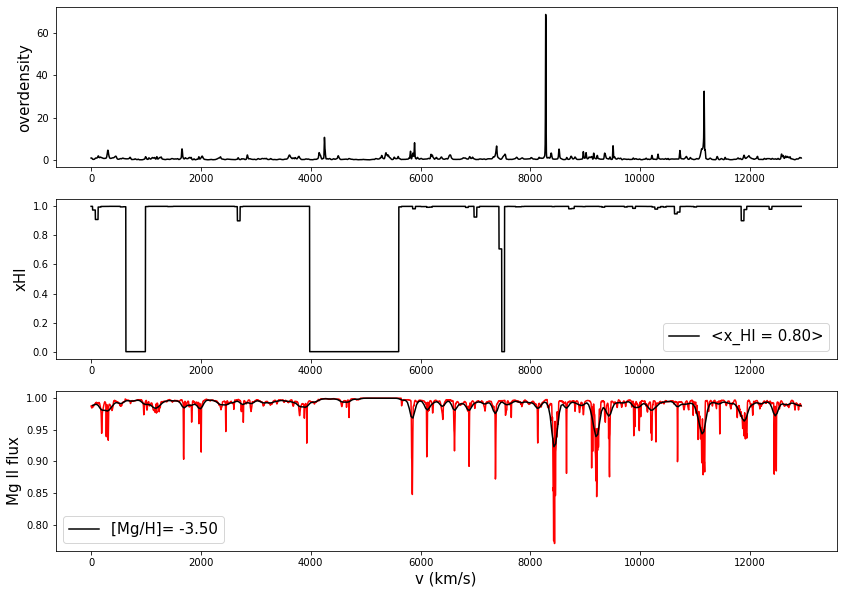

In [159]:
x_hi_label = '<x_HI = 0.80>'
mg_h_label = '[Mg/H]= -3.50'

plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(vel_hires, oden[0], c='k')
plt.ylabel('overdensity', fontsize=15)

plt.subplot(312)
plt.plot(vel_hires, xHI[0], c='k', label=x_hi_label)
plt.ylabel('xHI', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(313)
plt.plot(vel_hires, flux_igm_hires[0], c='r')
plt.plot(vel_lores, flux_igm_lores[0], c='k', label=mg_h_label)
plt.xlabel('v (km/s)', fontsize=15)
plt.ylabel('Mg II flux', fontsize=15)
plt.legend(fontsize=15)

print(np.mean(flux_igm_hires.flatten()))

Correlation between overdensity and x_HI? <br>
Mg II tracing neutral HI, so Mg II spectra also seems to be tracing the neutral islands. <br>
Larger x_HI, larger Mg II optica depth. <br>